In [95]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

**UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbd in position 0: invalid start byte**


In [96]:
df = pd.read_csv('한국-출생시-체중.csv', encoding='cp949')
df

,시도별,성별,출산순위별,출생시 체중별,항목,단위,2000 년,2001 년,2002 년,2003 년,...,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,Unnamed: 26
0,전국,계,총계,계,출생,명,640089,559934,496911,495036,...,471265,484550,436455,435435,438420,406243,357771,326822,302676,NaN
1,전국,계,총계,1.5㎏미만,출생,명,1544,1991,1760,1912,...,2935,3037,2961,2871,3032,2783,2530,2438,2328,NaN
2,전국,계,총계,1.5 - 1.9㎏,출생,명,4258,3897,3515,3624,...,3925,4337,4028,4152,4199,4045,3716,3501,3543,NaN
3,전국,계,총계,2.0 - 2.4㎏,출생,명,18546,16282,14437,14483,...,17787,18496,17200,17819,17952,17001,15776,14294,14044,NaN
4,전국,계,총계,2.5 - 2.9㎏,출생,명,121001,103614,89861,90780,...,102578,104883,95509,96395,95663,89241,79701,73631,69909,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395,제주특별자치도,여자,미상,3.0 - 3.4㎏,출생,명,5,5,1,0,...,1,3,0,2,0,3,3,8,0,NaN
5396,제주특별자치도,여자,미상,3.5 - 3.9㎏,출생,명,2,1,2,0,...,1,0,0,1,1,0,0,2,0,NaN
5397,제주특별자치도,여자,미상,4.0 - 4.4㎏,출생,명,1,1,0,0,...,0,0,0,0,0,0,0,0,0,NaN
5398,제주특별자치도,여자,미상,4.5㎏이상,출생,명,1,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [97]:
data = df[ (df['시도별'] == '전국') & (df['성별'] == '계') & (df['출산순위별'] == '총계')].iloc[1:9]
data

,시도별,성별,출산순위별,출생시 체중별,항목,단위,2000 년,2001 년,2002 년,2003 년,...,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,Unnamed: 26
1,전국,계,총계,1.5㎏미만,출생,명,1544,1991,1760,1912,...,2935,3037,2961,2871,3032,2783,2530,2438,2328,NaN
2,전국,계,총계,1.5 - 1.9㎏,출생,명,4258,3897,3515,3624,...,3925,4337,4028,4152,4199,4045,3716,3501,3543,NaN
3,전국,계,총계,2.0 - 2.4㎏,출생,명,18546,16282,14437,14483,...,17787,18496,17200,17819,17952,17001,15776,14294,14044,NaN
4,전국,계,총계,2.5 - 2.9㎏,출생,명,121001,103614,89861,90780,...,102578,104883,95509,96395,95663,89241,79701,73631,69909,NaN
5,전국,계,총계,3.0 - 3.4㎏,출생,명,298652,259534,227403,227592,...,223707,227565,204735,204656,204951,189001,166883,150657,140078,NaN
6,전국,계,총계,3.5 - 3.9㎏,출생,명,161967,144124,129694,127206,...,104502,109596,97398,95400,98075,90509,77152,70380,62454,NaN
7,전국,계,총계,4.0 - 4.4㎏,출생,명,29184,25851,23757,22624,...,14382,15237,13319,12854,13183,12328,10245,8935,7722,NaN
8,전국,계,총계,4.5㎏이상,출생,명,3148,2784,2570,2333,...,1145,1127,997,982,959,929,757,629,621,NaN


In [98]:
data = data.iloc[:, 3:-1]
data

,출생시 체중별,항목,단위,2000 년,2001 년,2002 년,2003 년,2004 년,2005 년,2006 년,...,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년
1,1.5㎏미만,출생,명,1544,1991,1760,1912,1827,1801,1892,...,2815,2935,3037,2961,2871,3032,2783,2530,2438,2328
2,1.5 - 1.9㎏,출생,명,4258,3897,3515,3624,3727,3321,3562,...,3940,3925,4337,4028,4152,4199,4045,3716,3501,3543
3,2.0 - 2.4㎏,출생,명,18546,16282,14437,14483,14210,13577,14254,...,16780,17787,18496,17200,17819,17952,17001,15776,14294,14044
4,2.5 - 2.9㎏,출생,명,121001,103614,89861,90780,89446,84996,88833,...,97993,102578,104883,95509,96395,95663,89241,79701,73631,69909
5,3.0 - 3.4㎏,출생,명,298652,259534,227403,227592,220570,203442,211341,...,221440,223707,227565,204735,204656,204951,189001,166883,150657,140078
6,3.5 - 3.9㎏,출생,명,161967,144124,129694,127206,120911,108464,109942,...,108638,104502,109596,97398,95400,98075,90509,77152,70380,62454
7,4.0 - 4.4㎏,출생,명,29184,25851,23757,22624,20729,18201,17355,...,15727,14382,15237,13319,12854,13183,12328,10245,8935,7722
8,4.5㎏이상,출생,명,3148,2784,2570,2333,2040,1721,1591,...,1305,1145,1127,997,982,959,929,757,629,621


C:\Users\VIP\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 13199 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\VIP\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\VIP\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\VIP\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\VIP\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\VIP\AppData\Roaming\Python\Python37\

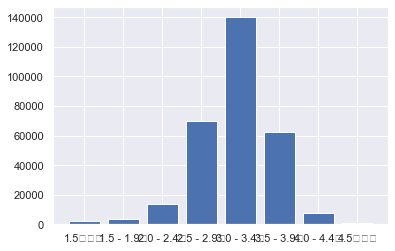

In [99]:
plt.bar(data['출생시 체중별'], data['2019 년']);

C:\Users\VIP\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 13199 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\VIP\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\VIP\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\VIP\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\VIP\AppData\Roaming\Python\Python37\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\VIP\AppData\Roaming\Python\Python37\

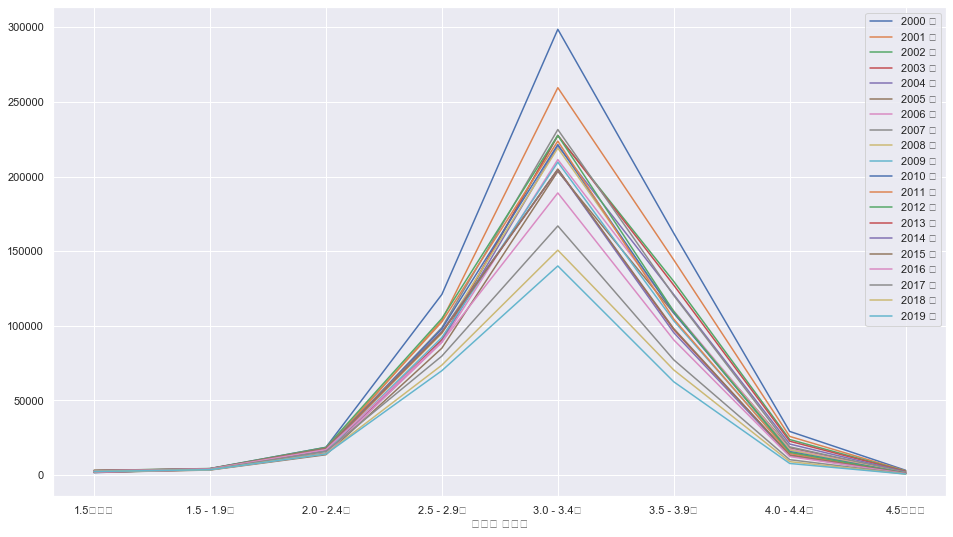

In [100]:
data.plot(figsize=(16,9), x='출생시 체중별')

### 한글폰트 사용

In [101]:
import matplotlib as mpl
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [102]:
mpl.__file__

'C:\\Users\\VIP\\AppData\\Roaming\\Python\\Python37\\site-packages\\matplotlib\\__init__.py'

In [103]:
mpl.matplotlib_fname()

'C:\\Users\\VIP\\AppData\\Roaming\\Python\\Python37\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

In [104]:
fontlist = fm.findSystemFonts()
fontlist[:10]

['C:\\Windows\\Fonts\\a하얀민들레M.ttf',
 'C:\\WINDOWS\\Fonts\\H2MKPB.TTF',
 'C:\\WINDOWS\\Fonts\\BRLNSDB.TTF',
 'C:\\Windows\\Fonts\\swissbi.ttf',
 'C:\\Windows\\Fonts\\a허상고딕M.ttf',
 'C:\\WINDOWS\\Fonts\\complex_.ttf',
 'C:\\WINDOWS\\Fonts\\a중명조.ttf',
 'C:\\WINDOWS\\Fonts\\a가을운동회M.ttf',
 'C:\\WINDOWS\\Fonts\\a옛날목욕탕M.ttf',
 'C:\\WINDOWS\\Fonts\\ARIALNBI.TTF']

In [105]:
for f in fm.fontManager.ttflist:
    if 'Nanum' in f.name:
        print(f.name, f.fname)

NanumMyeongjo C:\Windows\Fonts\NanumMyeongjoBold.ttf
NanumSquareRound C:\WINDOWS\Fonts\NanumSquareRoundB.ttf
NanumBarunpen C:\WINDOWS\Fonts\NanumBarunpenR.ttf
NanumSquareRound C:\WINDOWS\Fonts\NanumSquareRoundL.ttf
NanumMyeongjo C:\Windows\Fonts\NanumMyeongjoExtraBold.ttf
Nanum Brush Script C:\WINDOWS\Fonts\NanumBrush.ttf
NanumBarunpen C:\WINDOWS\Fonts\NanumBarunpenB.ttf
NanumGothic C:\WINDOWS\Fonts\NanumGothicLight.ttf
NanumSquare C:\Windows\Fonts\NanumSquareB.ttf
NanumGothic C:\WINDOWS\Fonts\NanumGothicBold.ttf
NanumBarunGothic C:\WINDOWS\Fonts\NanumBarunGothicLight.ttf
NanumSquare C:\Windows\Fonts\NanumSquareL.ttf
NanumGothic C:\Windows\Fonts\NanumGothicExtraBold.ttf
NanumBarunGothic C:\WINDOWS\Fonts\NanumBarunGothicUltraLight.ttf
NanumGothic C:\Windows\Fonts\NanumGothic.ttf
NanumBarunGothic C:\WINDOWS\Fonts\NanumBarunGothicBold.ttf
NanumSquareRound C:\WINDOWS\Fonts\NanumSquareRoundR.ttf
NanumBarunGothic YetHangul C:\Windows\Fonts\NanumBarunGothic-YetHangul.ttf
NanumSquare C:\Window

In [106]:
plt.rcParams['font.family']

['sans-serif']

Set font family to any font supporting glyphs of Korean characters.

In [107]:
plt.rcParams['font.family'] = 'NanumGothic'

Now we will see un-broken Korean in any matplotlib results.

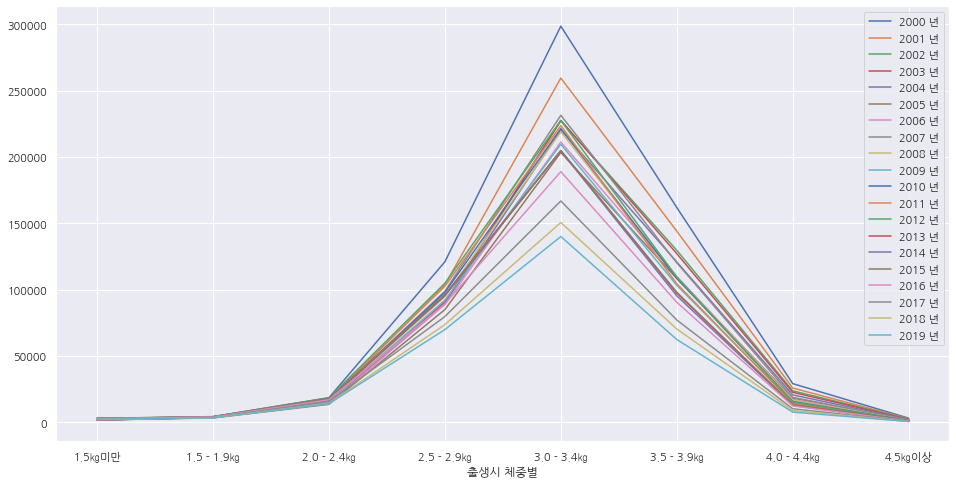

In [108]:
data.plot(figsize=(16,8), x='출생시 체중별');

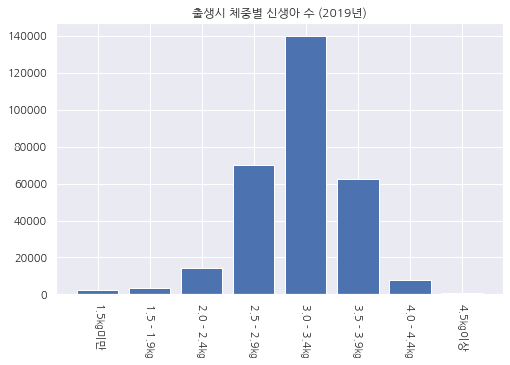

In [109]:
plt.figure(figsize=(8,5))
plt.bar(data['출생시 체중별'], data['2019 년']);
plt.xticks(rotation=-90);
plt.title('출생시 체중별 신생아 수 (2019년)');
plt.savefig('출생시-체중별-신생아수-2019년.png')

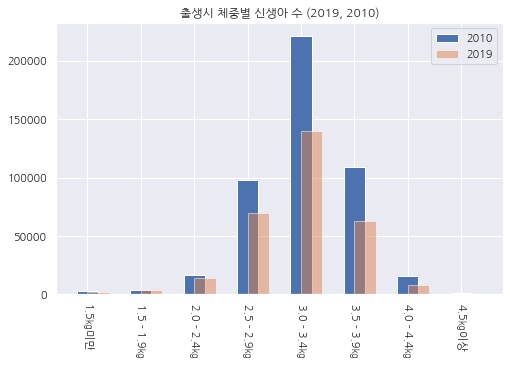

In [110]:
plt.figure(figsize=(8,5))
xindex = np.arange(len(data))
plt.bar(xindex, data['2010 년'], label='2010', width=.4);
plt.bar(.2 + xindex, data['2019 년'], label='2019', width=.4, alpha=.5);
labels = data['출생시 체중별'].values
plt.xticks(xindex, labels, rotation=-90)
plt.legend()
plt.title('출생시 체중별 신생아 수 (2019, 2010)');
plt.savefig('출생시-체중별-신생아수.png')

# UN Data

In [111]:
un = pd.read_csv('UN-성별-체중별-출생아수.csv', encoding='cp949')
un[:3]

,국가,성별,출생아 무게,항목,단위,2000 년,2001 년,2002 년,2003 년,2004 년,...,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,Unnamed: 24
0,알바니아,남녀합계,총계,출생아 수,NaN,NaN,NaN,44525.0,47012.0,43022.0,...,NaN,NaN,35473.0,35750.0,NaN,NaN,NaN,30869.0,NaN,NaN
1,알바니아,남녀합계,500 이하,출생아 수,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,121.0,83.0,NaN,NaN,NaN,0.0,NaN,NaN
2,알바니아,남녀합계,1000 이하,출생아 수,NaN,NaN,NaN,19.0,12.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
un.keys()

Index(['국가', '성별', '출생아 무게', '항목', '단위', '2000 년', '2001 년', '2002 년',
       '2003 년', '2004 년', '2005 년', '2006 년', '2007 년', '2008 년', '2009 년',
       '2010 년', '2011 년', '2012 년', '2013 년', '2014 년', '2015 년', '2016 년',
       '2017 년', '2018 년', 'Unnamed: 24'],
      dtype='object')

In [113]:
country=set()
for name in un['국가']: # looking for '미국' 
    if '미' in name:
        if name not in country:
            country.add(name)
            print(name)


미국


In [114]:
usa = un[un['국가'] == '미국']

In [115]:
usa

,국가,성별,출생아 무게,항목,단위,2000 년,2001 년,2002 년,2003 년,2004 년,...,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,Unnamed: 24
2401,미국,남녀합계,총계,출생아 수,NaN,4058814.0,4025933.0,4021726.0,4089950.0,4112052.0,...,NaN,3953590.0,3952841.0,3932181.0,3988076.0,3978497.0,NaN,NaN,NaN,NaN
2402,미국,남녀합계,500 이하,출생아 수,NaN,5952.0,5956.0,6268.0,6307.0,6282.0,...,NaN,5942.0,5947.0,5945.0,5936.0,5863.0,NaN,NaN,NaN,NaN
2403,미국,남녀합계,500 - 999,출생아 수,NaN,22797.0,22648.0,22845.0,22980.0,23433.0,...,NaN,21289.0,21432.0,20866.0,20721.0,20689.0,NaN,NaN,NaN,NaN
2404,미국,남녀합계,1000 - 1499,출생아 수,NaN,29218.0,29250.0,29431.0,29930.0,30925.0,...,NaN,29523.0,28873.0,28647.0,29290.0,29040.0,NaN,NaN,NaN,NaN
2405,미국,남녀합계,1500 - 1999,출생아 수,NaN,60793.0,60804.0,61652.0,63791.0,65691.0,...,NaN,62504.0,61499.0,61238.0,61992.0,62862.0,NaN,NaN,NaN,NaN
2406,미국,남녀합계,2000 - 2499,출생아 수,NaN,188270.0,190089.0,193881.0,201056.0,205441.0,...,NaN,200453.0,197958.0,198403.0,200908.0,202415.0,NaN,NaN,NaN,NaN
2407,미국,남녀합계,2500 - 2999,출생아 수,NaN,670849.0,680580.0,688630.0,711003.0,729675.0,...,NaN,728201.0,721840.0,715764.0,727987.0,729673.0,NaN,NaN,NaN,NaN
2408,미국,남녀합계,3000 - 3499,출생아 수,NaN,1510314.0,1515171.0,1521884.0,1557864.0,1573189.0,...,NaN,1545355.0,1540161.0,1529258.0,1546274.0,1544024.0,NaN,NaN,NaN,NaN
2409,미국,남녀합계,3500 - 3999,출생아 수,NaN,1164440.0,1139280.0,1125959.0,1131577.0,1124630.0,...,NaN,1048902.0,1058604.0,1054767.0,1071007.0,1062456.0,NaN,NaN,NaN,NaN
2410,미국,남녀합계,4000 - 4499,출생아 수,NaN,340384.0,322346.0,314182.0,309721.0,299081.0,...,NaN,265040.0,269581.0,269594.0,276592.0,274404.0,NaN,NaN,NaN,NaN


In [116]:
usa[['출생아 무게', '2015 년']][usa['성별']=='남녀합계']

,출생아 무게,2015 년
2401,총계,3978497.0
2402,500 이하,5863.0
2403,500 - 999,20689.0
2404,1000 - 1499,29040.0
2405,1500 - 1999,62862.0
2406,2000 - 2499,202415.0
2407,2500 - 2999,729673.0
2408,3000 - 3499,1544024.0
2409,3500 - 3999,1062456.0
2410,4000 - 4499,274404.0


In [117]:
data = usa[['출생아 무게', '2015 년']][usa['성별']=='남녀합계'].iloc[1:-1]

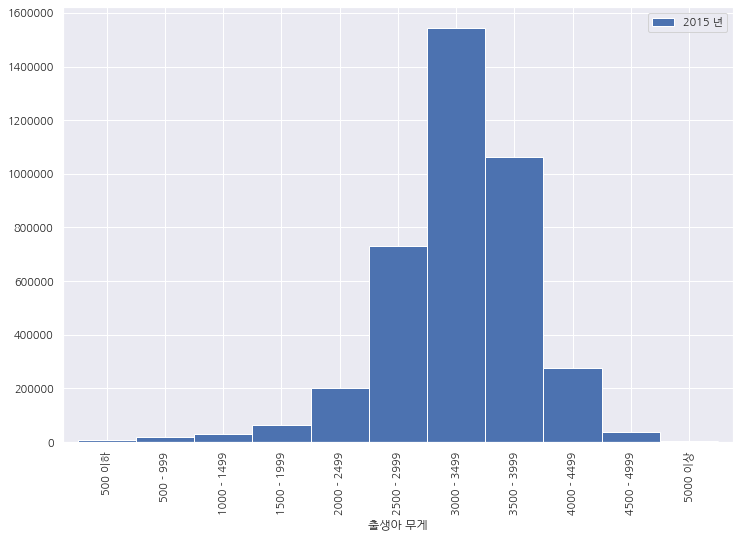

In [118]:
data.plot(x='출생아 무게', kind='bar', figsize=(12,8), width=1);
fig = plt.gcf()
fig.savefig('usa-babyweights.png')

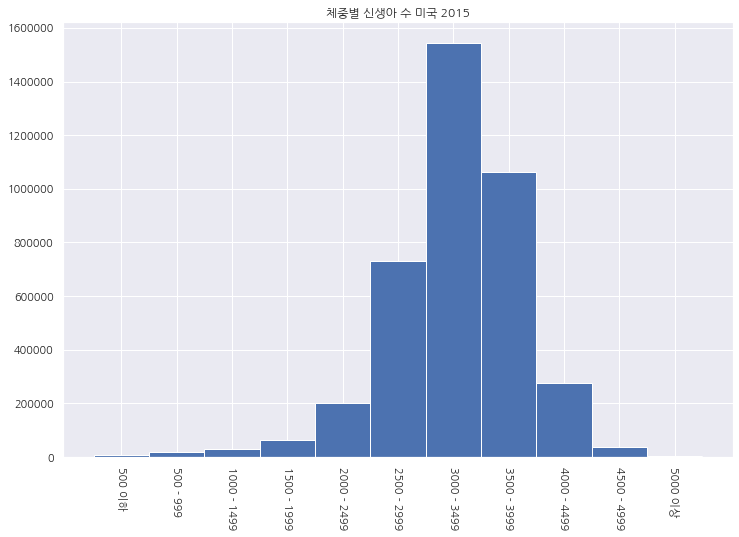

In [119]:
plt.figure(figsize=(12,8))
plt.bar(data['출생아 무게'], data['2015 년'], width=1);
plt.xticks(rotation=-90)
plt.title('체중별 신생아 수 미국 2015');
plt.savefig('체중별-미국.png')

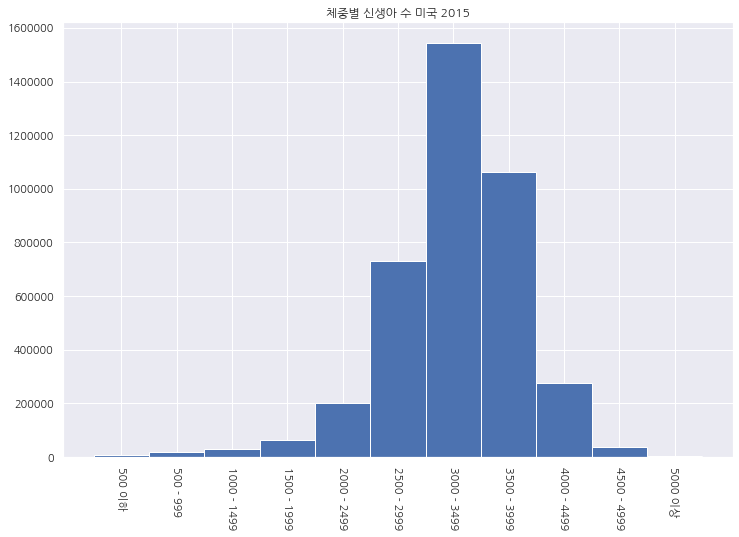

In [120]:
plt.figure(figsize=(12,8))
plt.bar(data['출생아 무게'], data['2015 년'], width=1);
plt.xticks(rotation=-90)
plt.title('체중별 신생아 수 미국 2015');
plt.savefig('체중별-미국.png')

## Normal Distribution Approximation

In [121]:
weights = np.arange(0., 5500, 500) + 250
data['weights'] = weights
weights, weights.dtype

(array([ 250.,  750., 1250., 1750., 2250., 2750., 3250., 3750., 4250.,
        4750., 5250.]), dtype('float64'))

In [122]:
n = data['2015 년'].values
ntotal = n.sum()
ntotal, n

(3974876.0, array([   5863.,   20689.,   29040.,   62862.,  202415.,  729673.,
        1544024., 1062456.,  274404.,   38796.,    4654.]))

In [123]:
len(weights), len(n)

(11, 11)

In [124]:
data['pmf'] = eprob
eprob = n / ntotal
eprob

array([0.00147501, 0.00520494, 0.00730589, 0.01581483, 0.0509236 ,
       0.18357126, 0.38844583, 0.26729287, 0.06903461, 0.0097603 ,
       0.00117085])

In [125]:
data

,출생아 무게,2015 년,weights,pmf
2402,500 이하,5863.0,250.0,0.001475
2403,500 - 999,20689.0,750.0,0.005205
2404,1000 - 1499,29040.0,1250.0,0.007306
2405,1500 - 1999,62862.0,1750.0,0.015815
2406,2000 - 2499,202415.0,2250.0,0.050924
2407,2500 - 2999,729673.0,2750.0,0.183571
2408,3000 - 3499,1544024.0,3250.0,0.388446
2409,3500 - 3999,1062456.0,3750.0,0.267293
2410,4000 - 4499,274404.0,4250.0,0.069035
2411,4500 - 4999,38796.0,4750.0,0.009760


<BarContainer object of 11 artists>

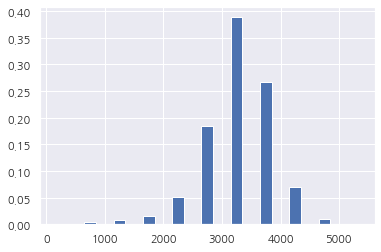

In [126]:
plt.bar(data.weights, data.pmf, width=200)

In [127]:
mean = np.sum(n*weights) / ntotal
mean

3271.1825475813584

In [128]:
np.dot(weights, eprob)

3271.182547581358

In [129]:
std = np.sqrt( np.dot( (weights - mean)**2, eprob ) )
std

607.8507942748333

In [130]:
normal = stats.norm(mean, std)

In [131]:
x = np.linspace(0, 5500, 100)
pdf = normal.pdf(x)

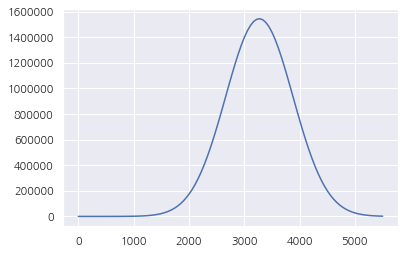

In [132]:
plt.plot(x, pdf * n.max() / pdf.max());

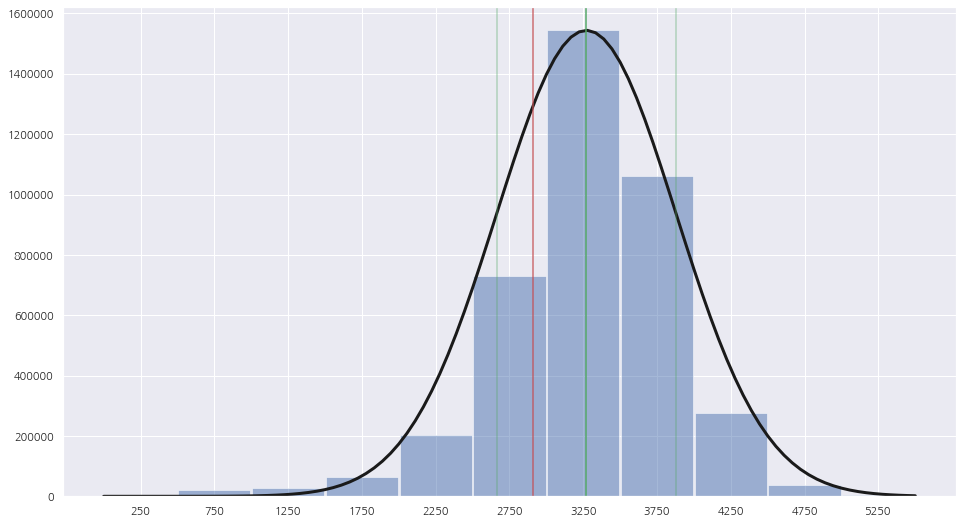

In [134]:
plt.figure(figsize=(16,9))
plt.bar(data.weights, n, width=490, alpha=.5)
plt.plot(x, pdf * n.max() / pdf.max(), lw=3, color='k');
plt.axvline(x=mean, color='g')
plt.axvline(x=mean+std, color='g', alpha=.4)
plt.axvline(x=mean-std, color='g', alpha=.4)
plt.axvline(x=2910, color='r', alpha=.8)
plt.xticks(ticks=range(250, 5500, 500));

### Random Simulation from normal/Gaussian distribution.

You should run it several times

In [159]:
ntotal = int(ntotal)
ntotal

3974876

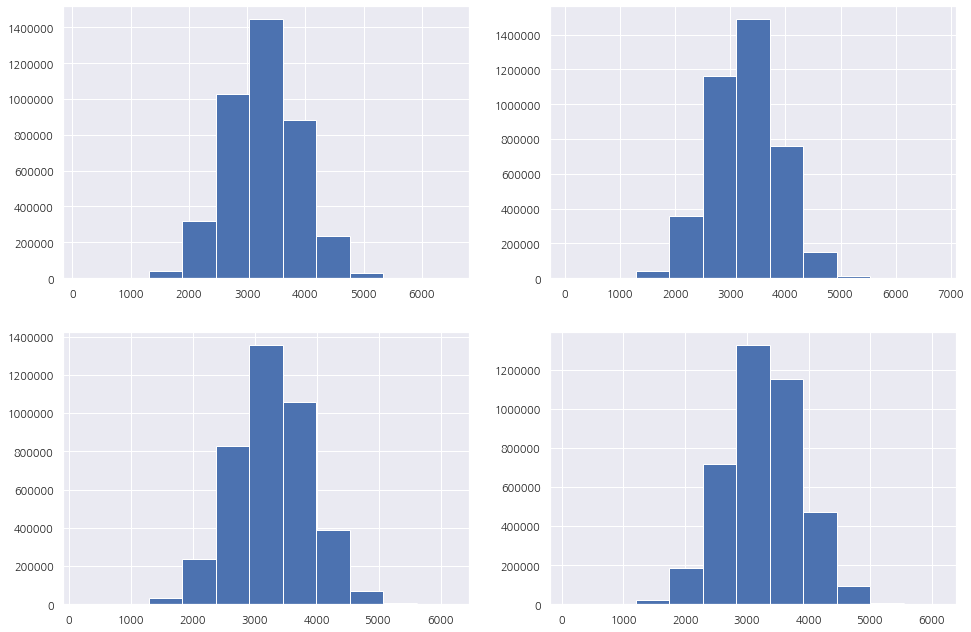

In [160]:
fig, axes = plt.subplots(2,2, figsize=(16,11))
for ax in axes.ravel():
    rs = normal.rvs(ntotal)
    ax.hist(rs, bins=11)

End.